In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [8]:
def display(img,cmap=None):
    fig=plt.figure(figsize=(10,8))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

In [9]:
para=cv2.imread('images/coin.jpg')

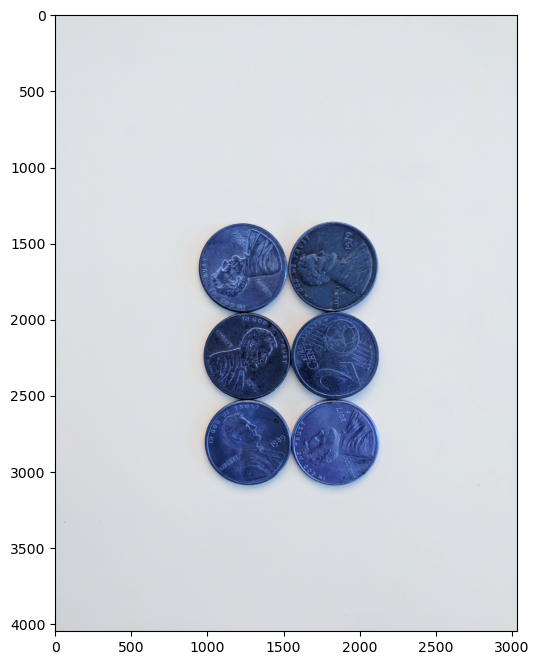

In [10]:
display(para)

In [22]:
gri=cv2.cvtColor(para,cv2.COLOR_BGR2GRAY)

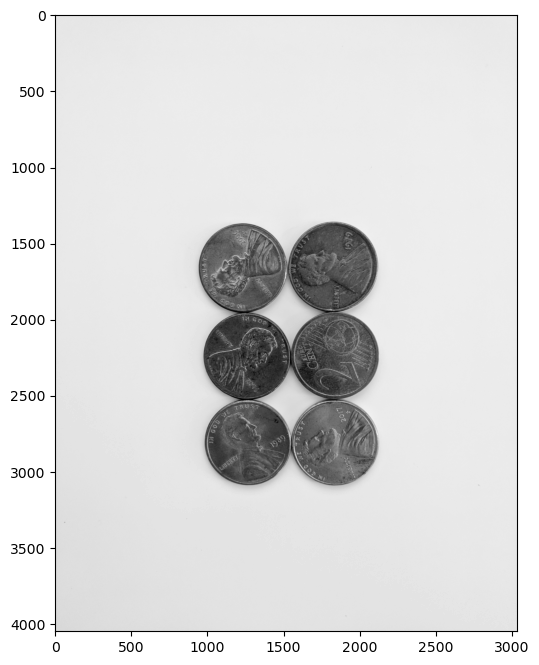

In [24]:
display(gri,cmap='gray')

In [25]:
blur=cv2.medianBlur(para,25)
               

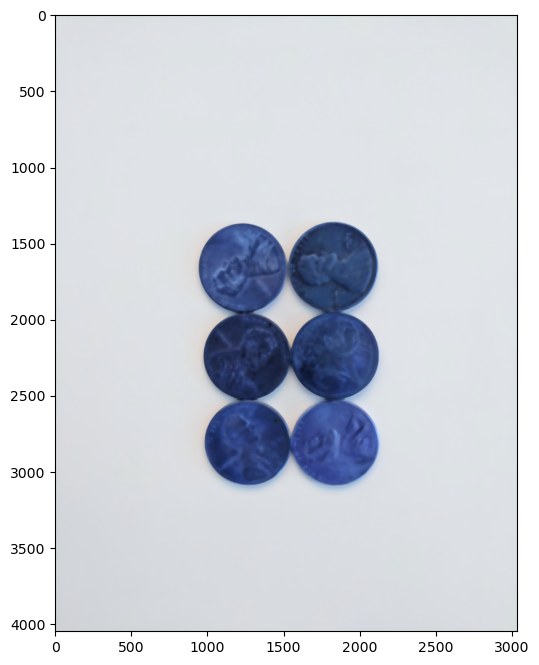

In [26]:
display(blur)

In [27]:
gri_blur=cv2.cvtColor(blur,cv2.COLOR_BGR2GRAY)

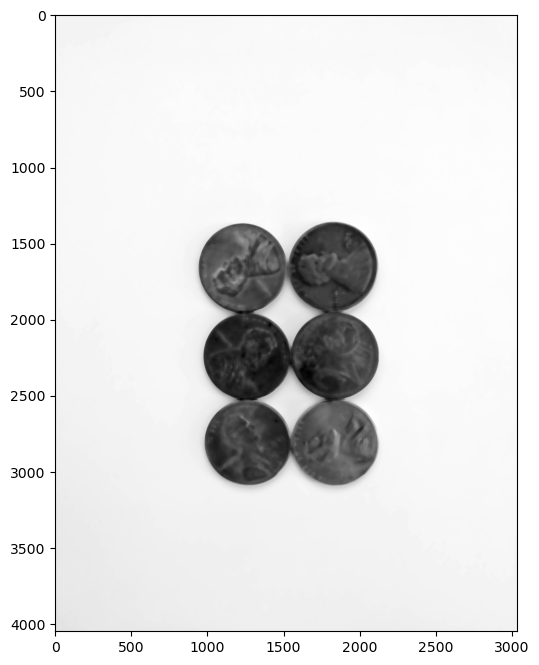

In [29]:
display(gri_blur,cmap='gray')

In [30]:
ret,thresh=cv2.threshold(gri_blur,160,255,cv2.THRESH_BINARY_INV)

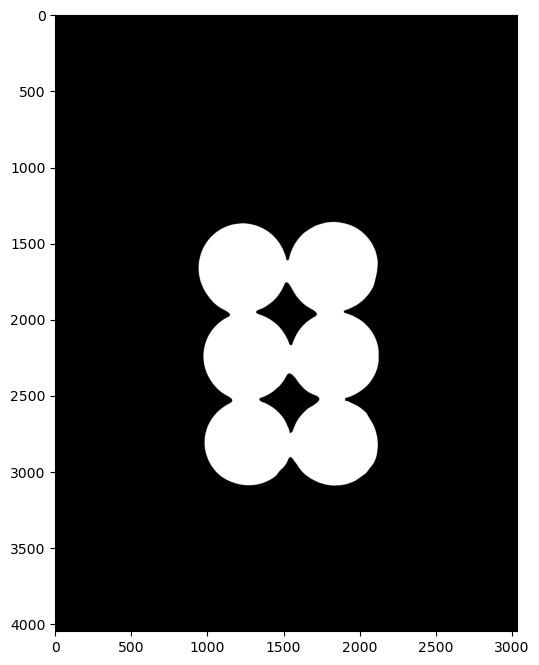

In [33]:
display(thresh,cmap='gray')

In [35]:
contours,hierarchy=cv2.findContours(thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [36]:
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(para,contours,i,(255,0,0),10)

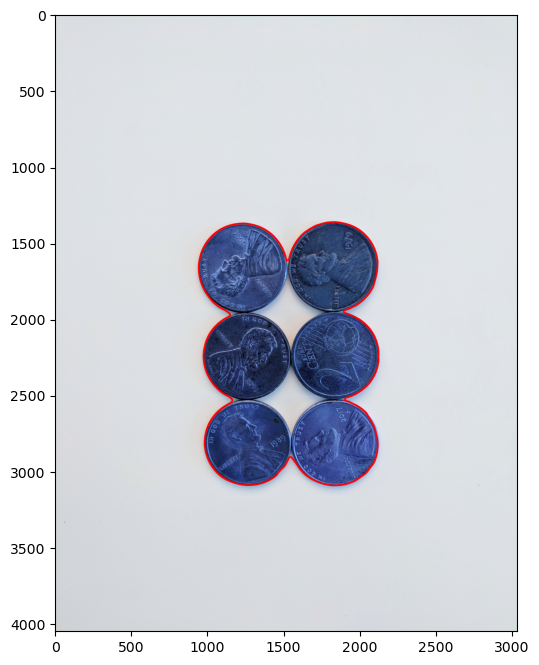

In [37]:
display(para)

In [38]:
img=cv2.imread('images/coin.jpg')

In [39]:
img=cv2.medianBlur(img,35)

In [40]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [43]:
ret,threshh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

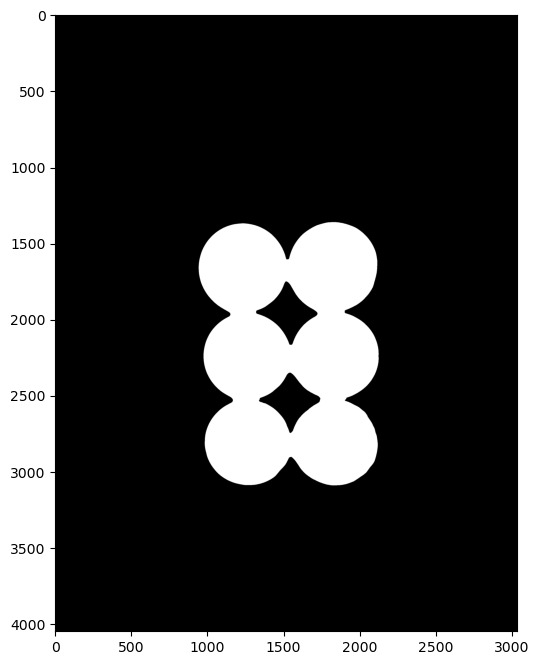

In [45]:
display(threshh,cmap='gray')

In [46]:
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(threshh,cv2.MORPH_OPEN,kernel,iterations=2)

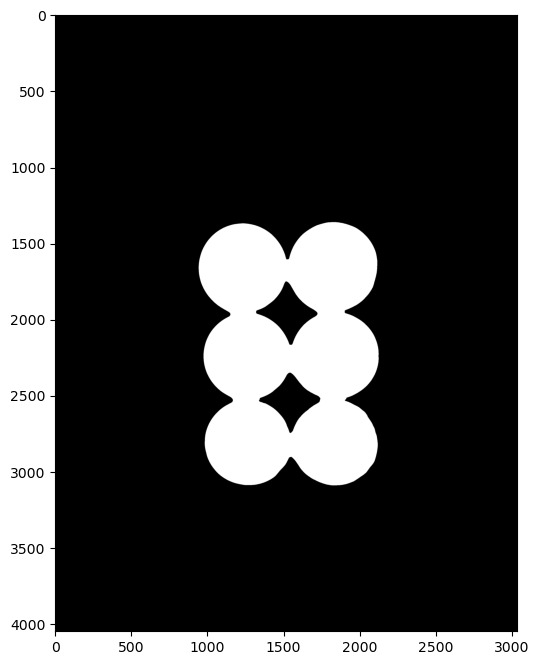

In [47]:
display(opening,cmap='gray')

In [48]:
sure_bg=cv2.dilate(opening,kernel,iterations=3)

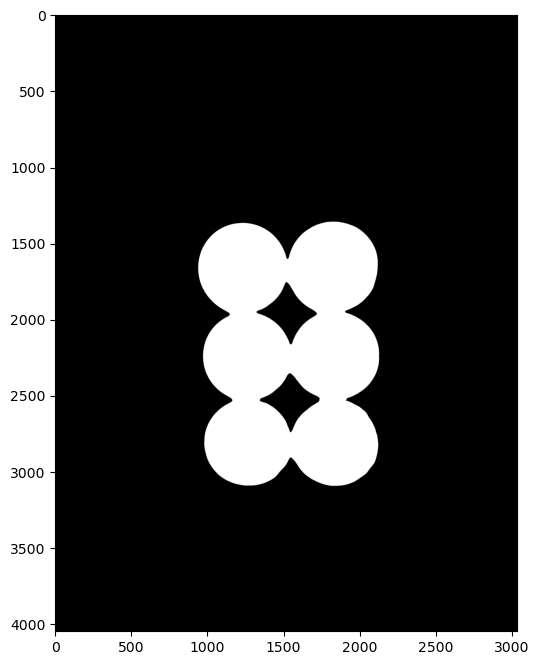

In [49]:
display(sure_bg,cmap='gray')

In [52]:
dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,sure_fg=cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
                          

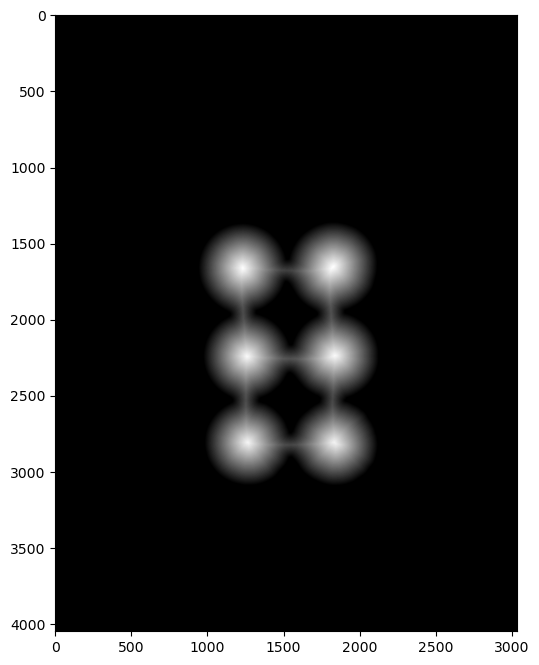

In [53]:
display(dist_transform,cmap='gray')

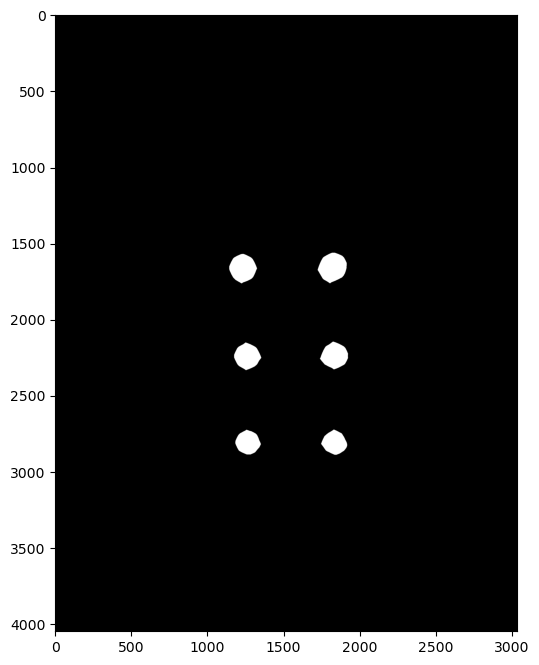

In [54]:
display(sure_fg,cmap='gray')

In [55]:
sure_fg=np.uint8(sure_fg)
unknow=cv2.subtract(sure_bg,sure_fg)

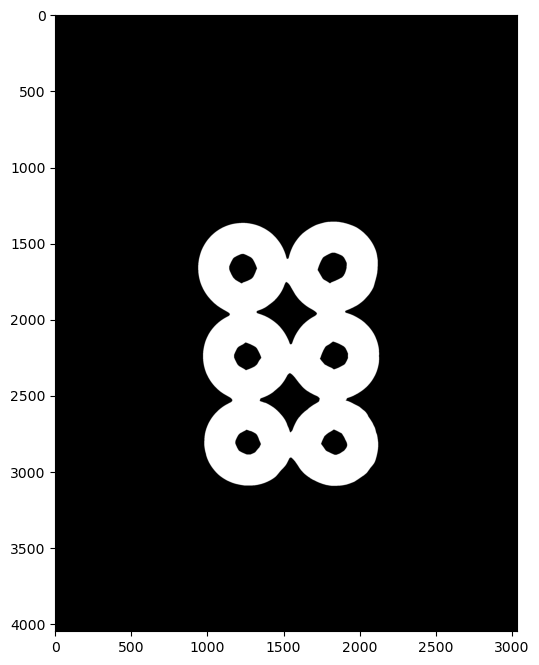

In [57]:
display(unknow,cmap='gray')

In [59]:
ret,markers=cv2.connectedComponents(sure_fg)
markers=markers+1
markers[unknow==255]=0

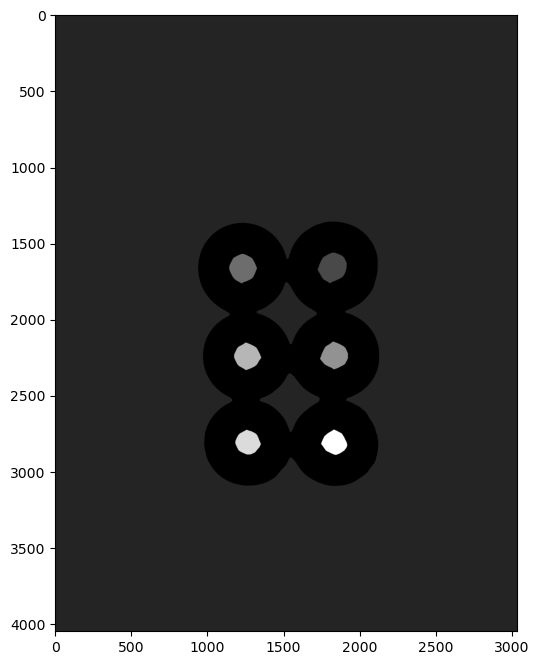

In [60]:
display(markers,cmap='gray')

In [62]:
markers=cv2.watershed(img,markers)

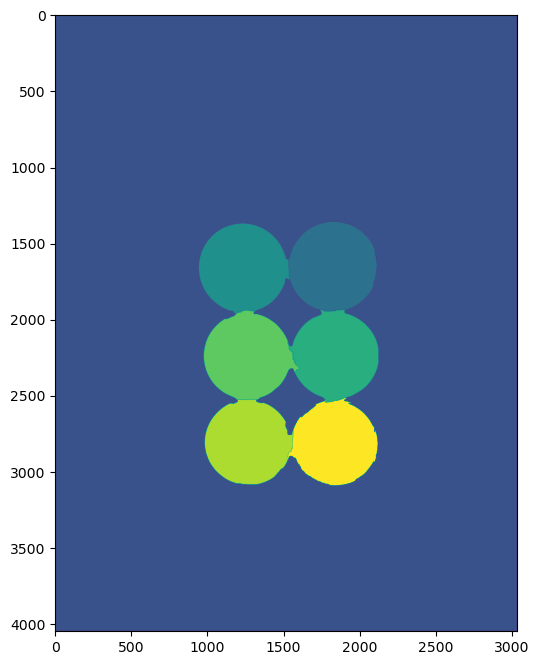

In [63]:
display(markers)

In [68]:
contours,hierarchy=cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(para,contours,i,(255,0,0),10)

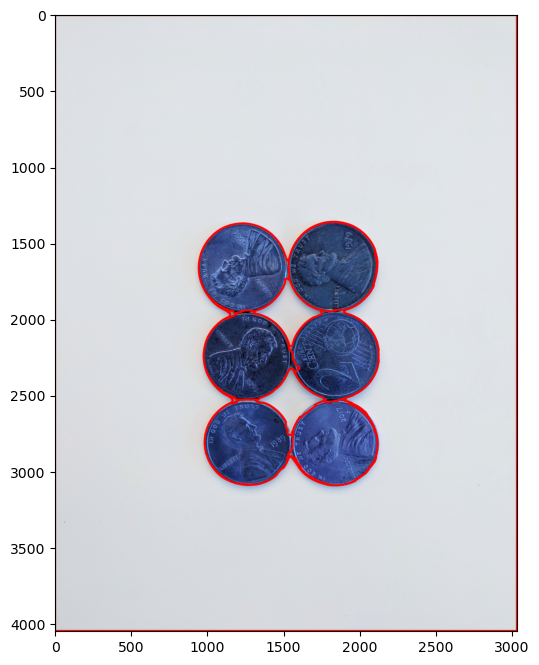

In [69]:
display(para)